In [40]:
import numpy as np
import itertools
import random
import copy   
import sys    
import matplotlib.pyplot as plt

In [19]:
# Function to be minimised
def rastrigin(x, A=10):
    return A * len(x) + sum([(xi**2 - A * np.cos(2 * np.pi * xi)) for xi in x])

In [20]:
class Particle: # all the material that is relavant at the level of the individual particles
    
    def __init__(self, dim, minx, maxx):
        self.position = np.random.uniform(low=minx, high=maxx, size=dim)
        self.velocity = np.random.uniform(low=-0.1, high=0.1, size=dim)
        self.best_particle_pos = self.position
        self.dim = dim
        self.fitness = rastrigin(self.position)
        self.best_particle_fitness = self.fitness  
        
    def setPos(self, pos):
        self.position = pos
        self.fitness = rastrigin(self.position)
        if self.fitness<self.best_particle_fitness:     
                                                        
            self.best_particle_fitness = self.fitness
            self.best_particle_pos = pos

    def updateVel(self, inertia, a1, a2, best_self_pos, best_swarm_pos):
                # Here we use the canonical version
                # V <- inertia*V + a1r1 (peronal_best - current_pos) + a2r2 (global_best - current_pos)
        cur_vel = self.velocity
        r1 = np.random.uniform(low=0, high=1, size = self.dim)
        r2 = np.random.uniform(low=0, high=1, size = self.dim)
        a1r1 = np.multiply(a1, r1)
        a2r2 = np.multiply(a2, r2)
        best_self_dif = np.subtract(best_self_pos, self.position)
        best_swarm_dif = np.subtract(best_swarm_pos, self.position)
                    # the next line is the main equation, namely the velocity update, 
                    # the velocities are added to the positions at swarm level
        new_vel = inertia*cur_vel + np.multiply(a1r1, best_self_dif) + np.multiply(a2r2, best_swarm_dif)
        self.velocity = new_vel
        return new_vel

In [72]:
class PSO: # all the material that is relavant at swarm leveel

    def __init__(self, w, a1, a2, dim, population_size, time_steps, search_range):

        self.w = w # Inertia
        self.a1 = a1 # Attraction to personal best
        self.a2 = a2 # Attraction to global best
        self.dim = dim

        self.swarm = [Particle(dim,-search_range,search_range) for i in range(population_size)]
        self.time_steps = time_steps
       
        self.best_swarm_pos = np.random.uniform(low=-500, high=500, size=dim)
        self.best_swarm_fitness = 1e100

    def run(self):
        for t in range(self.time_steps):
            for p in range(len(self.swarm)):
                particle = self.swarm[p]

                new_position = particle.position + particle.updateVel(self.w, self.a1, self.a2, particle.best_particle_pos, self.best_swarm_pos)
                                
                if new_position@new_position > 1.0e+18: # The search will be terminated if the distance 
                                                        # of any particle from center is too large
                    print('Time:', t,'Best Pos:',self.best_swarm_pos,'Best Fit:',self.best_swarm_fitness)
                    raise SystemExit('Most likely divergent: Decrease parameter values')
 
                self.swarm[p].setPos(new_position)

                new_fitness = rastrigin(new_position)

                if new_fitness < self.best_swarm_fitness:   # to update the global best both 
                                                            # position (for velocity update) and
                                                            # fitness (the new group norm) are needed
                    self.best_swarm_fitness = new_fitness
                    self.best_swarm_pos = new_position

            if t % 100 == 0: #we print only two components even it search space is high-dimensional
                print("Time: %6d,  Best Fitness: %14.9f,  Best Pos: %9.4f,%9.4f" % (t,self.best_swarm_fitness,self.best_swarm_pos[0],self.best_swarm_pos[1]), end =" ")
                if self.dim>2: 
                    print('...')
                else:
                    print('')

In [75]:
p = PSO(dim=7, w=0.7, a1=2.02, a2=2.02, population_size=600, time_steps=1001, search_range=100)
p.run()
p.best_swarm_fitness

Time:      0,  Best Fitness:  944.939816007,  Best Pos:    6.2622,  20.5422 ...
Time:    100,  Best Fitness:   17.358986622,  Best Pos:    1.0132,  -1.0094 ...
Time:    200,  Best Fitness:    6.486897750,  Best Pos:    0.9944,   0.0515 ...
Time:    300,  Best Fitness:    3.274659467,  Best Pos:    1.0034,  -0.0057 ...
Time:    400,  Best Fitness:    2.159718972,  Best Pos:   -0.0210,  -0.0038 ...
Time:    500,  Best Fitness:    1.188550228,  Best Pos:   -0.0116,  -0.0010 ...
Time:    600,  Best Fitness:    0.019281538,  Best Pos:    0.0039,  -0.0042 ...
Time:    700,  Best Fitness:    0.000221480,  Best Pos:    0.0002,   0.0001 ...
Time:    800,  Best Fitness:    0.000001119,  Best Pos:    0.0000,  -0.0000 ...
Time:    900,  Best Fitness:    0.000000011,  Best Pos:   -0.0000,   0.0000 ...
Time:   1000,  Best Fitness:    0.000000000,  Best Pos:   -0.0000,   0.0000 ...


8.949996299634222e-11

In [39]:
best_values = []
for dimension in range(2,6):
    dim_best = []    
    for population_size in range(1,200):
        p = PSO(dim=dimension, w=0.7, a1=2.02, a2=2.02, population_size=population_size, time_steps=1001, search_range=100)
        p.run()
        dim_best.append(p.best_swarm_fitness)
    best_values.append(dim_best)

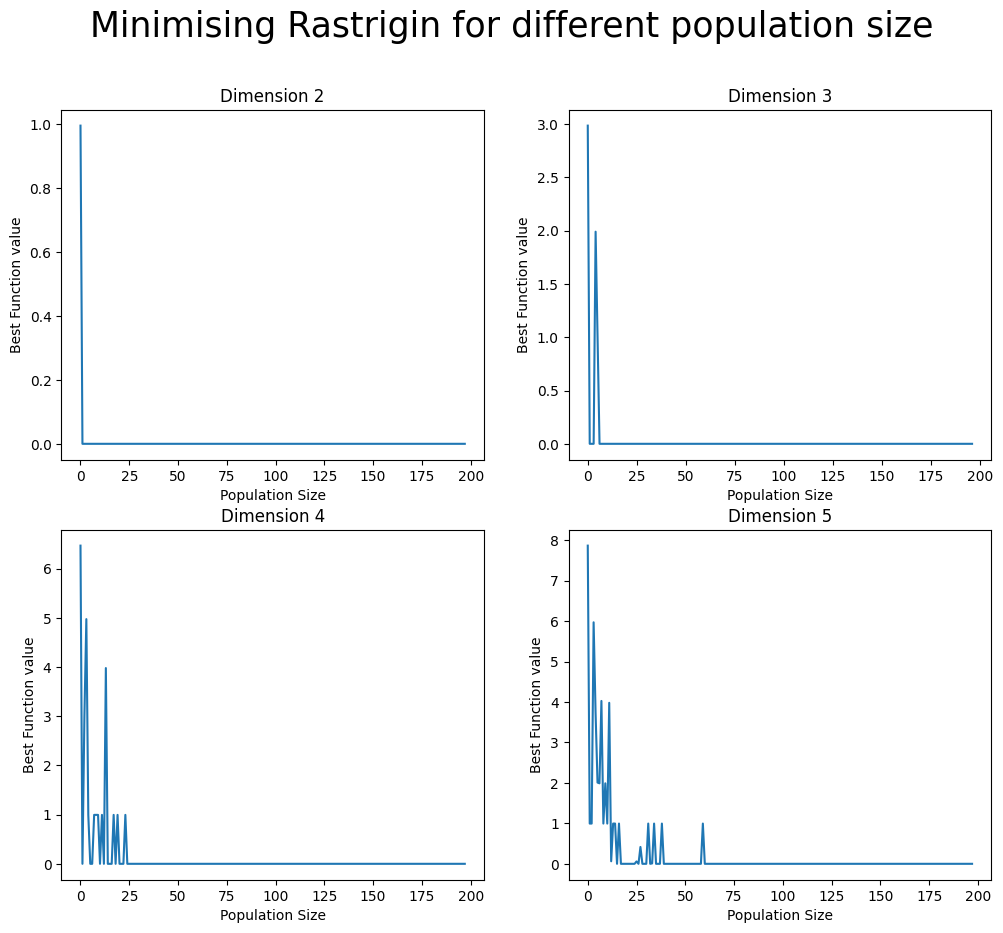

In [61]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(12,10))

# Plot data in each subplot using the separate axis variables
ax1.plot(range(len(best_values[0][1:])), best_values[0][1:])
ax1.set_xlabel('Population Size')
ax1.set_ylabel('Best Function value')
ax1.set_title('Dimension 2')

ax2.plot(range(len(best_values[1][2:])), best_values[1][2:])
ax2.set_xlabel('Population Size')
ax2.set_ylabel('Best Function value')
ax2.set_title('Dimension 3')


ax3.plot(range(len(best_values[2][1:])), best_values[2][1:])
ax3.set_xlabel('Population Size')
ax3.set_ylabel('Best Function value')
ax3.set_title('Dimension 4')


ax4.plot(range(len(best_values[3][1:])), best_values[3][1:])
ax4.set_xlabel('Population Size')
ax4.set_ylabel('Best Function value')
ax4.set_title('Dimension 5')

fig.suptitle('Minimising Rastrigin for different population size',fontsize=25)

fig.savefig('values_population_dimension.png')
np.save('best_values_dimensions.npy',np.array(best_values))

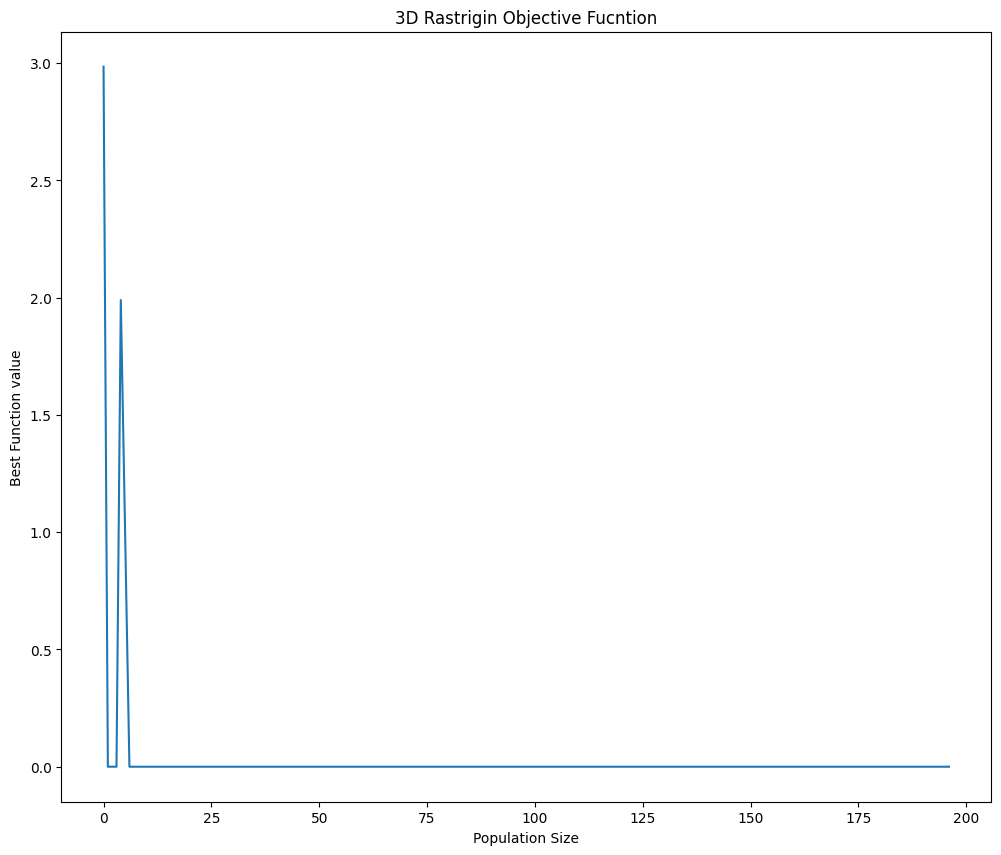

In [64]:
# for dimension 2 case 
fig2, ax21 = plt.subplots(1, 1,figsize=(12,10))

# Plot data in each subplot using the separate axis variables
ax21.plot(range(len(best_values[1][2:])), best_values[1][2:])
ax21.set_xlabel('Population Size')
ax21.set_ylabel('Best Function value')
ax21.set_title('3D Rastrigin Objective Fucntion')
fig2.savefig('2d_populations_values.png')

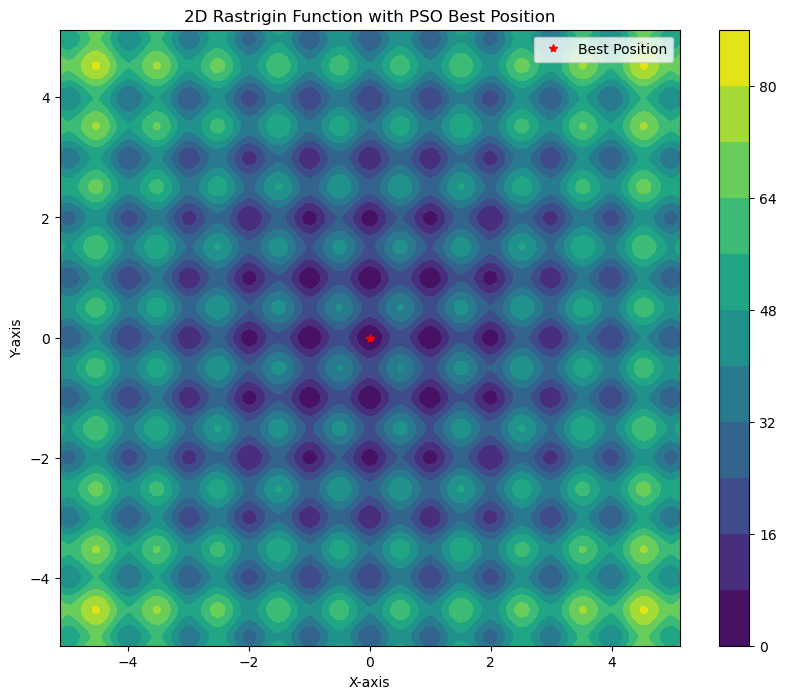

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Define the Rastrigin function for 2D
def rastrigin_2d(x, y, A=10):
    return A * 2 + (x ** 2 - A * np.cos(2 * np.pi * x)) + (y ** 2 - A * np.cos(2 * np.pi * y))

# Create a grid of points
X = np.linspace(-5.12, 5.12, 500)
Y = np.linspace(-5.12, 5.12, 500)
X, Y = np.meshgrid(X, Y)
Z = rastrigin_2d(X, Y)

# Plot the Rastrigin function
fig, ax = plt.subplots(figsize=(10, 8))
# contour = ax.contourf(X, Y, Z, cmap=cm.viridis)
contour = ax.contourf(X, Y, Z, 10, cmap=cm.viridis)

# Overlay the best position found by the PSO algorithm
# For demonstration purposes, let's assume the PSO found the minimum at the origin for the Rastrigin function

ax.plot(best_position[0], best_position[1], 'r*', markersize=6, label='Best Position')

# Add a color bar and labels
fig.colorbar(contour)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('2D Rastrigin Function with PSO Best Position')

# Show the legend
ax.legend()

# Show the plot
plt.show()
fig.savefig('rastrigin_2d.png')
